<a href="https://colab.research.google.com/github/Aditya9517/Aditya9517.github.io/blob/master/TopicSimilarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Measuring Similarity Between Two Models Of The Same Size

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import csv
import itertools
import numpy as np
import scipy
import copy
from queue import PriorityQueue
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.spatial.distance import jensenshannon
import warnings
warnings.filterwarnings("ignore")

# Reading Data from file


In [0]:
def read_topic_distribution():
  topic_model_values = []
  TM = []
  with open('/content/drive/My Drive/topic_model_distribution.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)
    for row in csv_reader:
      x = np.array(row)
      topic_model_values.append(x.astype(np.float64))
    
  for i in topic_model_values:
    count = 0
    r = []
    for j in i:
      r.append((count, j))
      count += 1
    TM.append(r)
  return TM

In [0]:
def measuring_similarity(TopicModel1, TopicModel2):
  # Variable
  Q = PriorityQueue()
  # for i in TM:
  #   print(i)
  # TopicModel1 = TM[0]
  # TopicModel2 = TM[1]
  seen_topics1 = []
  seen_topics2 = []
  Dx = 0
  T = []
  
  # Ordering Topic Models by Topic Distribution
  TopicModel1.sort(key=lambda tup: tup[1]) 
  TopicModel2.sort(key=lambda tup: tup[1]) 

  # print(TopicModel1)
  # print(TopicModel2)
  for t1 in TopicModel1:
    for t2 in TopicModel2:
      Dx = jensenshannon(t1, t2)
      Q.put((Dx,[t1, t2]))

  while not Q.empty():
    row = Q.get()
    topic1 = row[1][0]
    topic2 = row[1][1]
    
    if topic1 not in seen_topics1 and topic2 not in seen_topics2:
      seen_topics1.append(topic1)
      seen_topics2.append(topic2)
      T.append([topic1, topic2])

  # sorting the topics by topic distribution for each of the two topic models
  seen_topics1.sort(key=lambda tup: tup[1]) 
  seen_topics2.sort(key=lambda tup: tup[1]) 

  # print(seen_topics1)
  # print(seen_topics2)
  t1 = [k[0] for k in seen_topics1]
  t2 = [k[0] for k in seen_topics2]
  return stats.kendalltau(t1, t2)


In [30]:
corr = 0
p = 0
correl = []
TM = read_topic_distribution()
for TopicModeli in range(len(TM)):
  correlation = []
  pvalue = []
  for TopicModelj in range(len(TM)):
    if TopicModeli != TopicModelj:
      corr, p = measuring_similarity(TM[TopicModeli], TM[TopicModelj])
    correlation.append(corr)
    correl.append(corr)
  print("Topic Model"+str(TopicModeli), "corr = " + str(sum(correlation)/len(correlation)))
print("Average Kendall-Tau score over all pairs = ", str(sum(correl)/len(correl)))

Topic Model0 corr = 0.8734868446175581
Topic Model1 corr = 0.9146904952839195
Topic Model2 corr = 0.9354387036824887
Topic Model3 corr = 0.9371443846183221
Topic Model4 corr = 0.916879876783646
Topic Model5 corr = 0.8979137230941558
Topic Model6 corr = 0.9309581089853742
Topic Model7 corr = 0.9350822927406729
Topic Model8 corr = 0.9365333944323518
Topic Model9 corr = 0.9210040605389441
Topic Model10 corr = 0.9200366594111581
Topic Model11 corr = 0.9394610557401254
Topic Model12 corr = 0.9216914244981605
Topic Model13 corr = 0.9198075380914194
Topic Model14 corr = 0.9242626748641182
Topic Model15 corr = 0.8693244739756365
Topic Model16 corr = 0.9371443846183218
Topic Model17 corr = 0.9384427387635087
Topic Model18 corr = 0.8966153689489693
Topic Model19 corr = 0.9322310052061455
Topic Model20 corr = 0.9371443846183221
Average Kendall-Tau score over all pairs =  0.9207282663577783


In [0]:
def plot_it(x, y, xname, yname, topic=""):
    plt.clf()
    plt.plot(x, y, color='blue')
    if topic:
        plt.title(topic)
        plt.grid()
    plt.xlabel(xname, fontsize=12)
    plt.ylabel(yname, fontsize=12)
    plt.show()
parameter_list = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140]




c = [0.8734868446175581
,0.9146904952839195
,0.9354387036824887
, 0.9371443846183221
,0.916879876783646
,0.8979137230941558
,0.9309581089853742
,0.9350822927406729
,0.9365333944323518
,0.9210040605389441
,0.9200366594111581
,0.9394610557401254
, 0.9216914244981605
,0.9198075380914194
,0.9242626748641182
,0.8693244739756365
,0.9371443846183218
,0.9384427387635087
,0.8966153689489693
,0.9322310052061455
,0.9371443846183221]

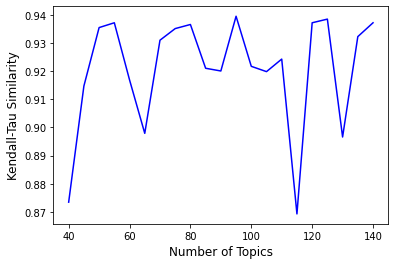

In [39]:
plot_it(parameter_list, c, "Number of Topics", "Kendall-Tau Similarity")